# 01 PyTorch Workflow
- Resource Notebook: - https://www.learnpytorch.io/01_pytorch_workflow/
1. Preparing and loading data.
2. Building a model.
3. Training the model.
4. Making predictions.
5. Saving and loading the model.

## 0. Importing Dependencies

In [1]:
import torch
import numpy
from torch import nn
import matplotlib.pyplot as plt

## 1. ETL of Data

### Using straight line equation ( y = m*x + b) to create a dataset.

In [2]:
weight = 0.9  #m
bias = 0.4      #b

start = 0
end = 1
step = 0.05
X = torch.arange(start, end, step).unsqueeze(dim=1) #Inputs
y = weight * X + bias #Labels or outputs

X[:5], y[:5], 

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000]]),
 tensor([[0.4000],
         [0.4450],
         [0.4900],
         [0.5350],
         [0.5800]]))

In [3]:
len(X), len(y)

(20, 20)

### Splitting data

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_preds(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    '''
    Function that plots the data and prediction
    '''
    plt.figure(figsize=(16,8))
    plt.scatter(train_data, train_labels, c='b', label="Training Data")
    plt.scatter(test_data, test_labels, c='r', label = "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', label='Predictions')
    plt.legend()
    plt.show()

## 2. Building a model

In [6]:
class LinearRegression(nn.Module):  # <- Everything in pytorch inherits from nn.module
    '''
    Class that implements the Linear Regression Model
    '''
    def __init__(self):
        super().__init__()
        #Random initalization of parameters
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Forward Prop
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #Straight line equation

In [7]:
#Setting a random seed.
torch.manual_seed(42)

#Instance of our model
model_0 = LinearRegression() 

#Checking params
for i in model_0.parameters(): # <- .parameters() returns a generator object
    print(i)

Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
#Making predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4150],
        [0.4318],
        [0.4487]])

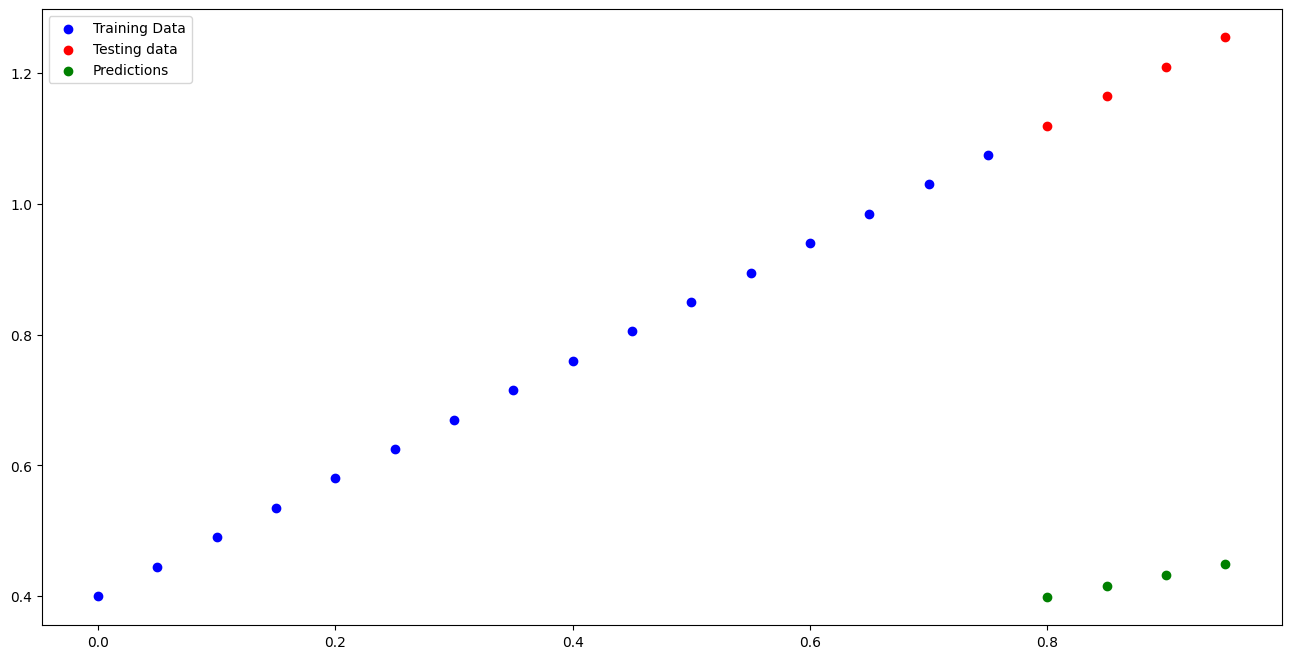

In [10]:
plot_preds(predictions=y_preds)

In [11]:
#Cost function
loss_fn = nn.L1Loss() # <- Mean Absolute Error

#Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # <- Stochastic Gradient Descent


## 3. Training and Testing Loop

In [13]:
epochs = 300

epoch_count = []
train_loss_val = []
test_loss_val = []

for epoch in range(epochs):
    model_0.train() #Training mode

    #Forward pass
    y_pred = model_0(X_train)

    #Cost function computation
    loss = loss_fn(y_pred, y_train)

    #Optimizer
    optimizer.zero_grad()

    #Backprop
    loss.backward()

    #Progressing the optimizer
    optimizer.step()

    #Testing
    model_0.eval()  #Turns off he gradient tracking to save memory and speed up the training process

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%20 == 0:
        epoch_count.append(epoch)
        train_loss_val.append(loss.detach().numpy()) # <- As these are all tensors, we need to convert them to numpy array
        test_loss_val.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.4710254669189453 | Test Loss: 0.7375239133834839
Epoch: 20 | Loss: 0.24290049076080322 | Test Loss: 0.4718990623950958
Epoch: 40 | Loss: 0.09464488923549652 | Test Loss: 0.26308673620224
Epoch: 60 | Loss: 0.07204948365688324 | Test Loss: 0.1846570074558258
Epoch: 80 | Loss: 0.06413837522268295 | Test Loss: 0.15134495496749878
Epoch: 100 | Loss: 0.05724459886550903 | Test Loss: 0.13490790128707886
Epoch: 120 | Loss: 0.05034962296485901 | Test Loss: 0.11847078800201416
Epoch: 140 | Loss: 0.04344964399933815 | Test Loss: 0.10203340649604797
Epoch: 160 | Loss: 0.03654967248439789 | Test Loss: 0.08559605479240417
Epoch: 180 | Loss: 0.029649699106812477 | Test Loss: 0.06915855407714844
Epoch: 200 | Loss: 0.022749725729227066 | Test Loss: 0.05272117257118225
Epoch: 220 | Loss: 0.015849744901061058 | Test Loss: 0.03628376126289368
Epoch: 240 | Loss: 0.00894976407289505 | Test Loss: 0.019846349954605103
Epoch: 260 | Loss: 0.0020497888326644897 | Test Loss: 0.00340893864631652

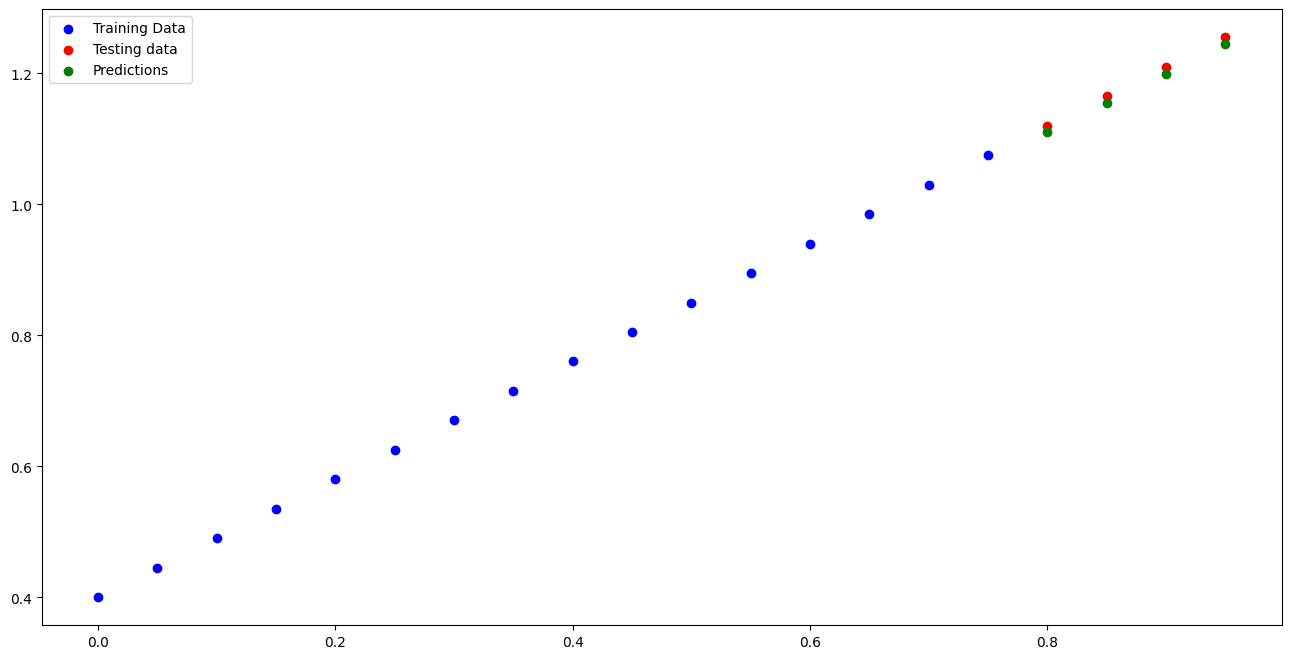

In [14]:
plot_preds(predictions=test_pred)

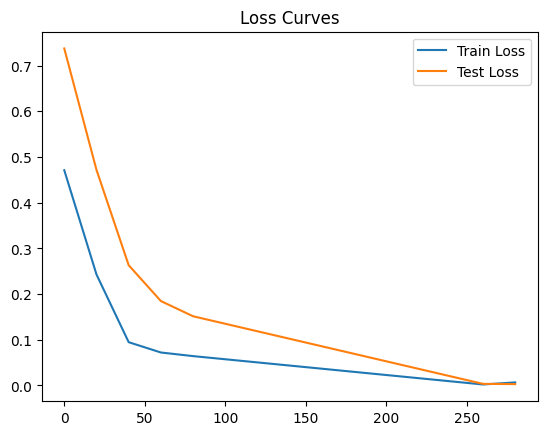

In [16]:
plt.plot(epoch_count, train_loss_val, label="Train Loss")
plt.plot(epoch_count, test_loss_val, label='Test Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()